## Coin Flipping Problem
This is a simulation of a coin flipping problem I had in my Problem Solving Seminar at UNC for a problem that goes as such: we have a biased coin with probability p of landing heads. Amy and Betty will flip this coin until either three heads appears (HHH) and betty wins or a heads tails head pattern (HTH) and amy wins. For which values of p is the game fair, i.e. they have an equal chance of winning despite the improbable coin. My argument was along the lines of, we only care about the last three flips because these are the only ones in the winning scenario. Thus we can make the following tree:
![Flipping Tree](fliptree.png  "Flip Tree")

If we get tails on the first flip, neither player can win until flip 4, so we can disregard this flip entirely. If we get heads, we have 2 options after, HT and HH. If we get heads on the third for either one (HTH or HHH), one player wins with probability $p^2(1-p)$ or $p^3$ respectively. If we get tails on the third flip. We again need 3 more flips to win, and then we arrive at the same tree if we simply ignore the first 3 flips. An easier way to think of this argument is that if a player is to win on flip n, both have the same probability of winning given n-3 flips have already occured. My professor argued that you should consider future flips, as if the first three are THH, only Betty can win on the next flip. At this point in time, I do not know who is correct, but I obviously think I am. Lets see!

In [34]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st

df = pd.read_csv('./coinsimulation.csv')
df = df.drop('Unnamed: 0', axis=1)
df.columns = ['pval', 'Betty Wins', 'Amy Wins']
df['Total Games'] = df['Betty Wins'] + df["Amy Wins"]
df['Betty Percent'] = df['Betty Wins'] / df['Total Games']
df['Amy Percent'] = df['Amy Wins'] / df['Total Games']
df.loc[0, [col for col in df.columns]] = [0,0,1,1,0,1]
df.head()


,pval,Betty Wins,Amy Wins,Total Games,Betty Percent,Amy Percent
0,0.00,0.0,1.0,1.0,0.000000,1.000000
1,0.05,14541.0,288308.0,302849.0,0.048014,0.951986
2,0.10,55229.0,548334.0,603563.0,0.091505,0.908495
3,0.15,190654.0,1243392.0,1434046.0,0.132948,0.867052
4,0.20,344621.0,1655379.0,2000000.0,0.172311,0.827689


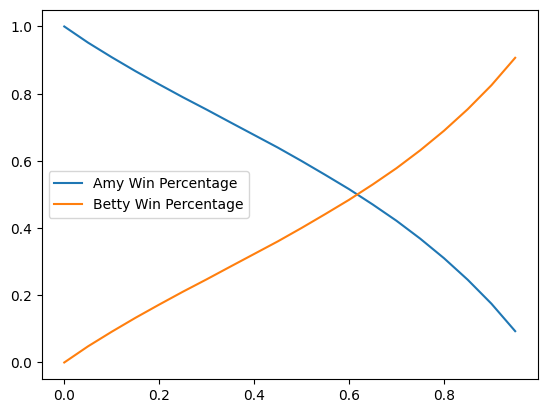

In [26]:
plt.scatter(df['pval'], df['Amy Percent'], label='Amy Win Percentage')
plt.scatter(df['pval'], df['Betty Percent'], label='Betty Win Percentage')
plt.legend()
plt.show()

## Whoops!
Looks like I messed up a bit. Specifcally, the error can be seen where I form the tree, but fail to consider the fourth column. after HH, you can either end with HHH and betty wins or you can end with HHT, and you flip again, but only amy can win from here. As, if you flip a HHTH, Amy wins, but HHTT and we have reset the problem because now you both need 3 flips to win. Thus, the probabilities of $p^3$ and $p^2(1-p) + p^3(1-p)$ must be equal, which happens at $p = 0$ and $p = \frac{2}{3}$ What an interesting problem! Hope you enjoyed our short detour into this.